## 1. Importing Useful Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## 2. Defining a required data-set as a data frame

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/Adidas US Sales Datasets.xlsx")

## 3. Inspecting Top 5 and Bottom 5 Rows of Dataset

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [ ]:
df.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
9647,NaN,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,NaN,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet
9651,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Women's Street Footwear,29,83,2407,649.89,0.27,Outlet


## 4. Data Preprocessing

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns = df.iloc[3]
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

In [ ]:
df.drop([0, 1, 2, 3], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


### 4.1 Inspecting info, shape and describing the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [ ]:
df.shape

(9648, 13)

In [ ]:
df.describe()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648.0,9648,9648.0,9648.0,9648.00,9648
unique,6,4,724,5,50,52,6,146.0,361,3512.0,6510.0,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225,100000.0,21000.0,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557.0,207,52.0,34.0,1229.00,4889


In [ ]:
df.describe().T

,count,unique,top,freq
3,,,,
Retailer,9648,6,Foot Locker,2637
Retailer ID,9648,4,1185732,5265
Invoice Date,9648,724,2021-01-17 00:00:00,77
Region,9648,5,West,2448
State,9648,50,California,432
City,9648,52,Portland,360
Product,9648,6,Men's Street Footwear,1610
Price per Unit,9648.0,146.0,50.0,557.0
Units Sold,9648,361,225,207


### 4.2 Find whether null exists

In [ ]:
df.isnull().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Note: So no null values exist in the dataset.

### 4.3 Changing datatype of Invoice Date

In [ ]:
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"])

Note: We are removing the time of day aspect from the Invoice Date as it is not an useful information and timestamp is 00:00:00 for every datapoint.

### 4.4 Converting required columns from object type to numeric type for ease of analysis

In [ ]:
columns_to_convert = ["Retailer ID","Price per Unit", "Units Sold", "Total Sales", "Operating Profit", "Operating Margin"]

for column in columns_to_convert:
  df[column] = pd.to_numeric(df[column],errors = "coerce")

In [ ]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


### 5. Statistical Data

In [ ]:
df.describe()

3,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
3,,,,,,,,
Retailer ID,9648.0,1.173850e+06,26360.377309,1128299.0,1.185732e+06,1185732.00,1185732.00,1197831.0
Price per Unit,9648.0,4.521663e+01,14.705397,7.0,3.500000e+01,45.00,55.00,110.0
Units Sold,9648.0,2.569300e+02,214.252030,0.0,1.060000e+02,176.00,350.00,1275.0
Total Sales,9648.0,9.327344e+04,141916.016727,0.0,4.254500e+03,9576.00,150000.00,825000.0
Operating Profit,9648.0,3.442524e+04,54193.113713,0.0,1.921753e+03,4371.42,52062.50,390000.0
Operating Margin,9648.0,4.229913e-01,0.097197,0.1,3.500000e-01,0.41,0.49,0.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [ ]:
df.shape

(9648, 13)

## 6. Data Visualisation

### 6.1 Total Sales and Operating Profit for All Retailers

In [ ]:
df["Retailer"].value_counts()

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64

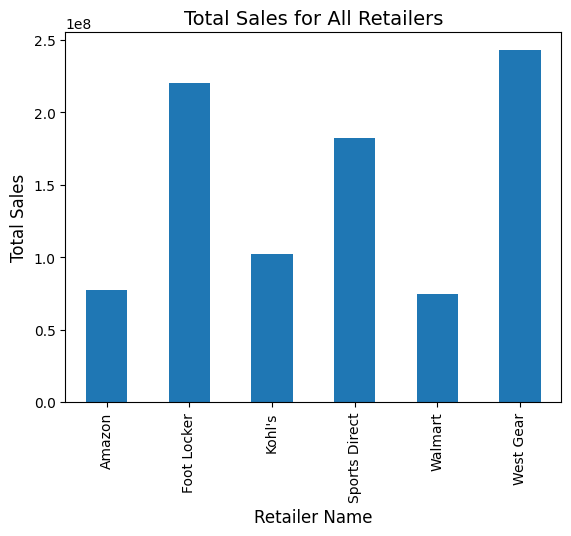

In [ ]:
df.groupby("Retailer").sum(numeric_only=True)["Total Sales"].plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Retailer Name", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales for All Retailers",fontsize=14)
plt.figsize = (500,500)
plt.show()

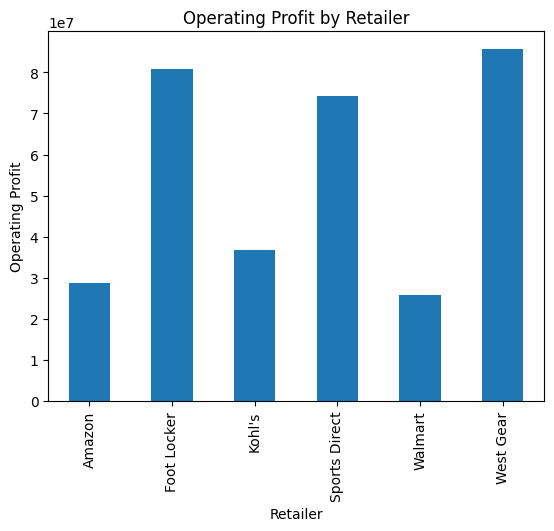

In [ ]:
df.groupby("Retailer").sum(numeric_only=True)["Operating Profit"].plot(kind="bar")
plt.title('Operating Profit by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Operating Profit')
plt.xticks(rotation="vertical")
plt.show()

Observations

*West Gear leads with the Operating profit of 85.67 million dollars
* The top 2nd (Foot Locker) and 3rd (Sports Direct) closely compete with each other with a profit of 80.72 million and 74.33 million.
* Kohl's, Amazon, and Walmart have significant contributions, but when compared to the top 3 their contributions are less.

### 6.2 Total Sales Per Region and Topmost and Bottommost cities

In [ ]:
df.Region.value_counts()

West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: Region, dtype: int64

In [ ]:
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False).reset_index()
region_sales

,Region,Total Sales
0,West,269943182.0
1,Northeast,186324067.0
2,Southeast,163171236.0
3,South,144663181.0
4,Midwest,135800459.0


In [ ]:
px.pie(region_sales,values="Total Sales",names='Region',title="Total Sales by Region")

Note: West has the highest total sales, followed by North East. Southeast, South and Midwest take up the 3rd, 4th and 5th spot respectively.

In [ ]:
df['City_State'] = df['City'] + ', ' + df['State'] #Considering city names alone does not make sense, as some states have common city names.

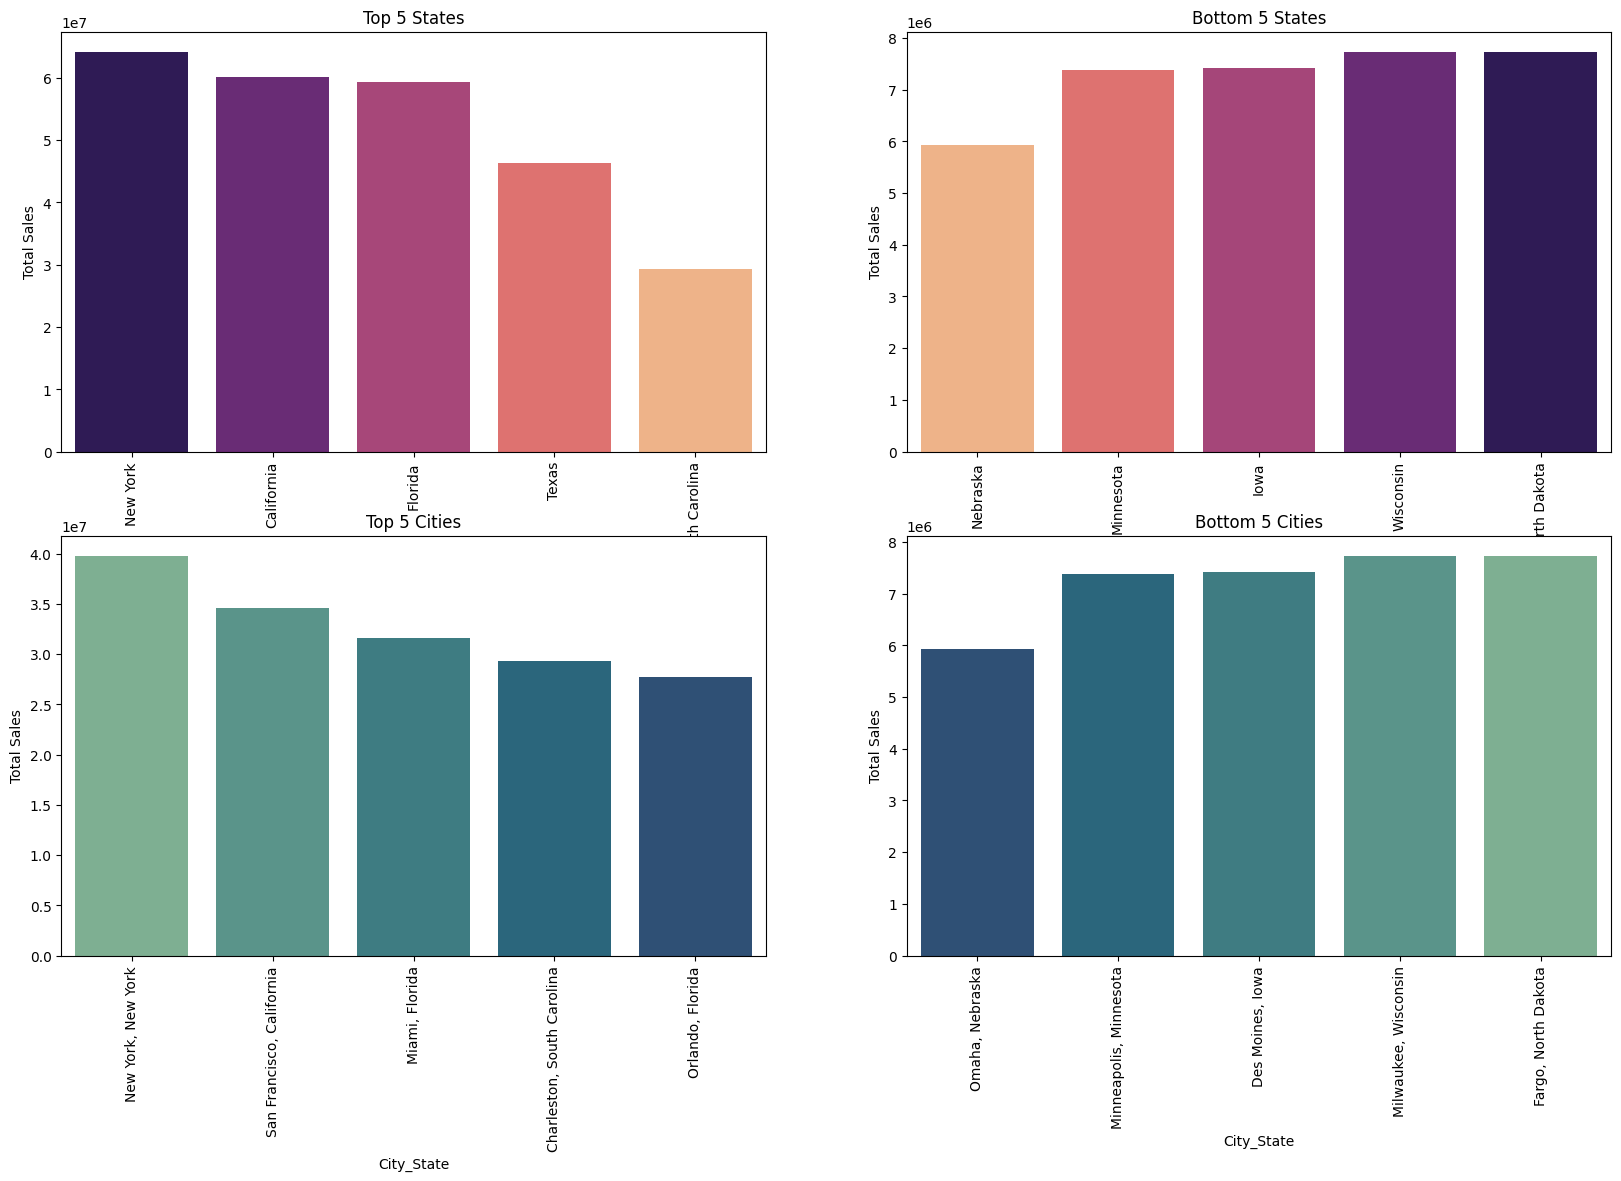

In [ ]:
top_states = df.groupby('State')['Total Sales'].sum().nlargest(5).reset_index()
bottom_states = df.groupby('State')['Total Sales'].sum().nsmallest(5).reset_index()

top_cities = df.groupby('City_State')['Total Sales'].sum().nlargest(5).reset_index()
bottom_cities = df.groupby('City_State')['Total Sales'].sum().nsmallest(5).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.barplot(x='State', y='Total Sales', data=top_states,palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 States')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x='State', y='Total Sales', data=bottom_states,palette='magma_r', ax=axes[0, 1])
axes[0, 1].set_title('Bottom 5 States')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.barplot(x='City_State', y='Total Sales', data=top_cities,palette='crest', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Cities')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.barplot(x='City_State', y='Total Sales', data=bottom_cities, palette='crest_r' , ax=axes[1, 1])
axes[1, 1].set_title('Bottom 5 Cities')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.show()

Observations

*New York state holds first place with total sales of 64.22 million dollars.
California and Florida have close competition for second place
* Nebraska is the least-selling state with 5.92 million dollars.
* While the other 4 states (Minnesota, Iowa, Wisconsin, North Dakota) in the bottom 5 have sales of around 7 million dollars.
* New York City holds first place with sales of 39.80 million dollars, followed by San Francisco with sales of 34.53 million dollars.
* Omaha is the least-selling city with 5.92 million dollars followed by Minneapolis, Des Moines, Milwaukee and Fargo

### 6.3 Adding Year, Month and Day Columns in the dataset for Analysis

In [ ]:
df['Year'] = df['Invoice Date'].dt.year # this gives serial number of the year
df['Month1'] = df['Invoice Date'].dt.month # this gives serial number of the month
df['Month'] = df['Invoice Date'].dt.strftime('%B')  # %B gives full month name
df['Day'] = df['Invoice Date'].dt.strftime('%A')    # %A gives full weekday name

### 6.4 Top Selling Product Category

In [ ]:
df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin']] = df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin']].astype(float)

#### Checking the datatype of the newly changed numeric columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
 14  Month1            9648 n

#### Top Product by Total Sales

In [ ]:
top_prod_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).reset_index()
top_prod_sales

,Product,Total Sales
0,Men's Street Footwear,208826244.0
1,Women's Apparel,179038860.0
2,Men's Athletic Footwear,153673680.0
3,Women's Street Footwear,128002813.0
4,Men's Apparel,123728632.0
5,Women's Athletic Footwear,106631896.0


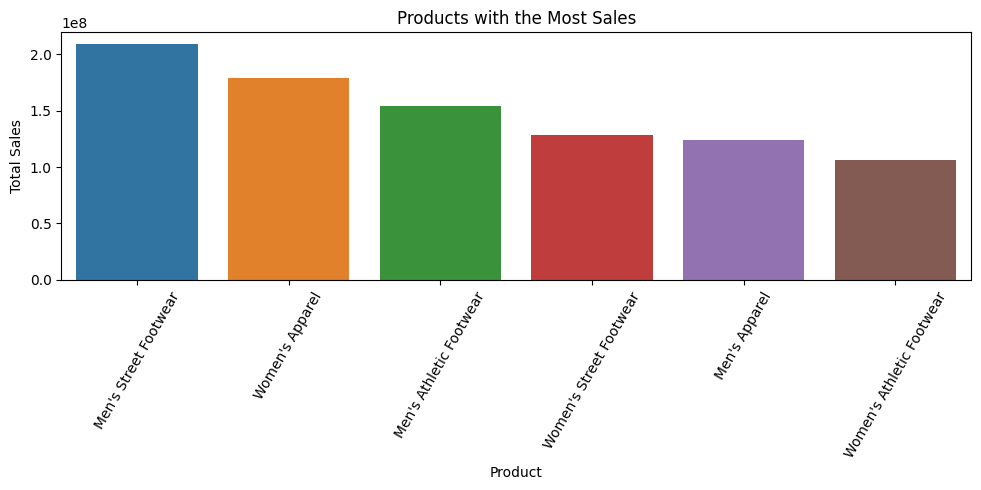

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_prod_sales["Product"],y=top_prod_sales["Total Sales"])
plt.title("Products with the Most Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Note: Top sold products by total sales is men's street footwear, followed by women's apparel.

#### Top Product by Units Sold

In [ ]:
top_prod_units = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).reset_index()
top_prod_units

,Product,Units Sold
0,Men's Street Footwear,593320.0
1,Men's Athletic Footwear,435526.0
2,Women's Apparel,433827.0
3,Women's Street Footwear,392269.0
4,Women's Athletic Footwear,317236.0
5,Men's Apparel,306683.0


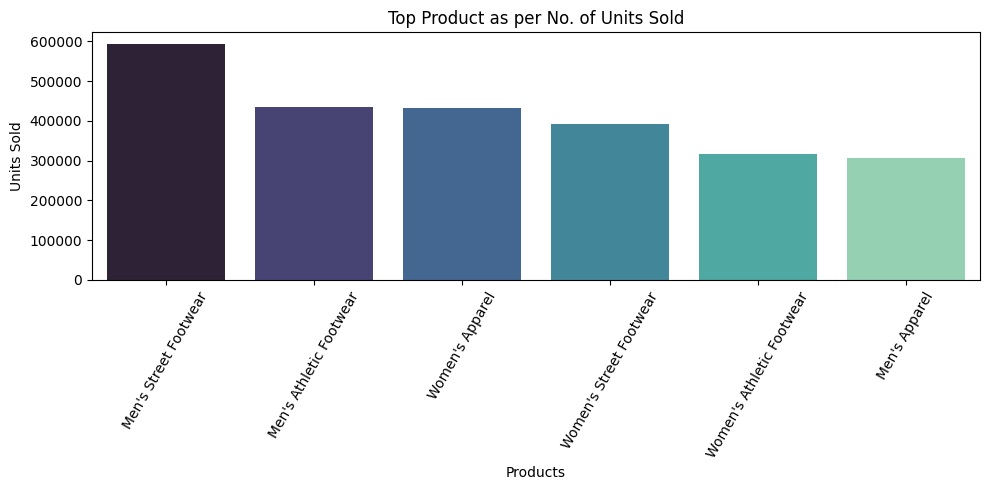

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_prod_units['Product'],y=top_prod_units['Units Sold'],palette='mako')
plt.title("Top Product as per No. of Units Sold")
plt.xlabel("Products")
plt.ylabel("Units Sold")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Note: Top sold products as per no. of units sold is men's street footwear, followed by men's athletic footwear.

### 6.5 Regions with the most operating profit

In [ ]:
top_regions = df.groupby('Region')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
top_regions

,Region,Operating Profit
0,West,89609406.55
1,Northeast,68020587.65
2,South,61138004.07
3,Southeast,60555416.70
4,Midwest,52811346.48


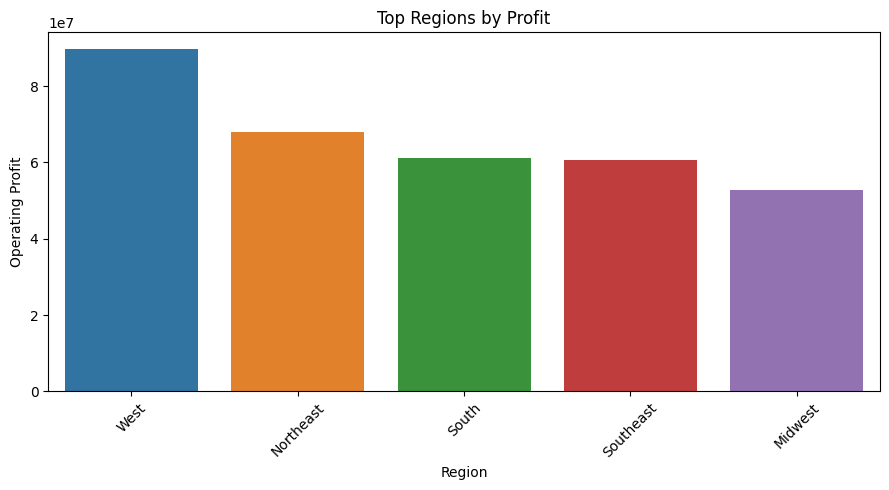

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x=top_regions['Region'],y=top_regions['Operating Profit'])
plt.title("Top Regions by Profit")
plt.xlabel("Region")
plt.ylabel("Operating Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Note: West has the highest operating profit, followed by North East. South, Southeast and Midwest take up the 3rd, 4th and 5th spot respectively.

### 6.6 Sales Method with the Most Operating Profit (in Million)

In [ ]:
df["Operating_Prof_Mil"] = df["Operating Profit"]/1000000
sales_met = df.groupby("Sales Method")["Operating_Prof_Mil"].sum().sort_values(ascending=False).reset_index()
sales_met

,Sales Method,Operating_Prof_Mil
0,In-store,127.591288
1,Outlet,107.988297
2,Online,96.555176


#### Bar Chart Representation

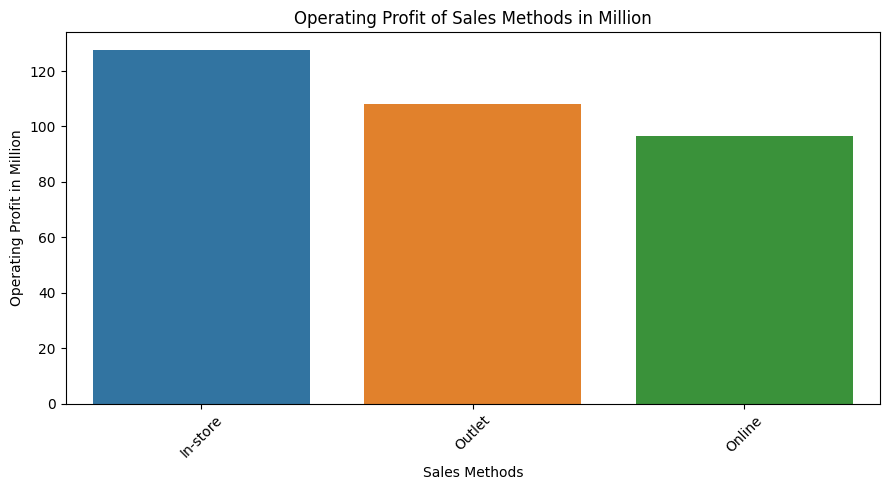

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x=sales_met["Sales Method"],y=sales_met["Operating_Prof_Mil"])
plt.title("Operating Profit of Sales Methods in Million")
plt.xlabel("Sales Methods")
plt.ylabel("Operating Profit in Million")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Pie Chart Representation

In [ ]:
colors = ['#99FFDE', '#ffde99', '#de99ff']

In [ ]:
px.pie(sales_met,values='Operating_Prof_Mil',names='Sales Method',title="Operating Profit Distribution as per Sales Method", hole=0.4, color_discrete_sequence=colors)

Note: Instore and Offline are still preferred methods of purchase in USA. However, online purchasing is catching up fast.

### 6.7 Boxplots of numeric columns (Outlier detection)



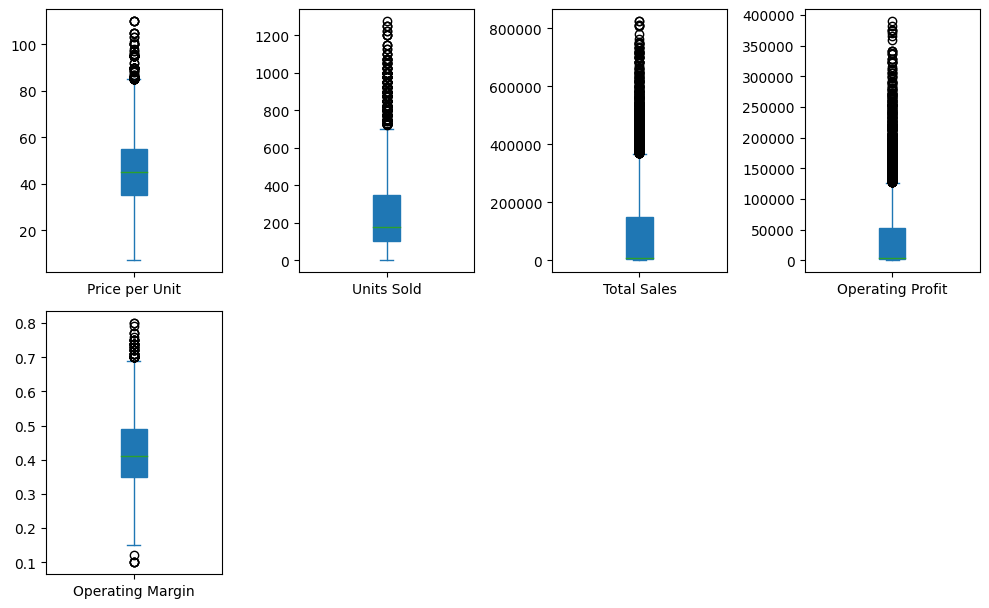

In [ ]:
numeric_columns = ['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin']
df[numeric_columns].plot(subplots=True, layout=(4,4), kind="box", figsize=(10,12),patch_artist=True)
plt.tight_layout()
plt.show()

Note: Most of the products are profitable. There are several outliers for all the numeric columns.

### 6.8 Heatmap / Correlation Matrix for Numeric Columns

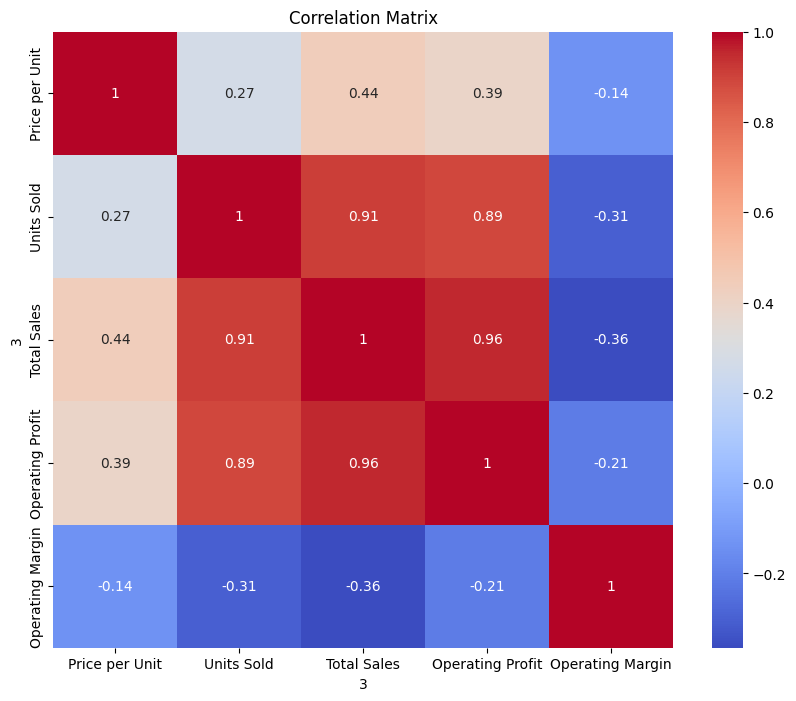

In [ ]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

Note: There is a positive correlation between units sold and total sales, as well as units sold and operating profit, which makes sense. There is strong positive correlation of 0.96 between total sales and operating profit.

### 6.9 Relationship between price per unit and region

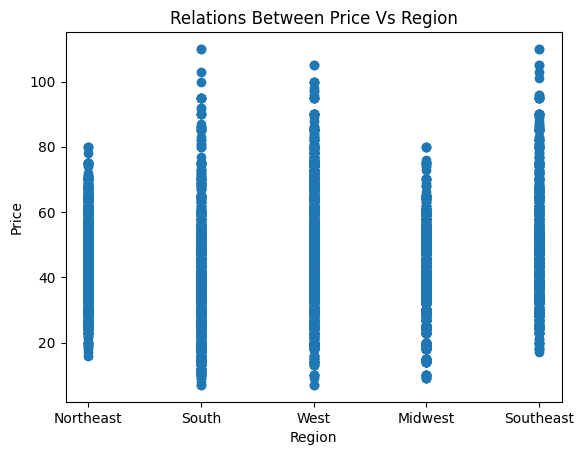

In [ ]:
plt.scatter(df["Region"], df["Price per Unit"])
plt.title("Relations Between Price Vs Region")

# Setting the X and Y labels
plt.xlabel('Region')
plt.ylabel('Price')

plt.show()

Note: The range of price per unit is highest in the South region followed by the Southeast and the West region. The Northeast and Midwest region have a shorter range of price per unit of products.

### 6.10 Display The relation Between Sales and Top 10 Cities

In [ ]:
top_cities = df.groupby("City")["Total Sales"].sum().nlargest(10).reset_index()
top_cities

,City,Total Sales
0,Charleston,39974797.0
1,New York,39801235.0
2,San Francisco,34539220.0
3,Miami,31600863.0
4,Portland,30545652.0
5,Orlando,27682851.0
6,Seattle,26330718.0
7,Los Angeles,25634913.0
8,Houston,25456882.0
9,Albany,24427804.0


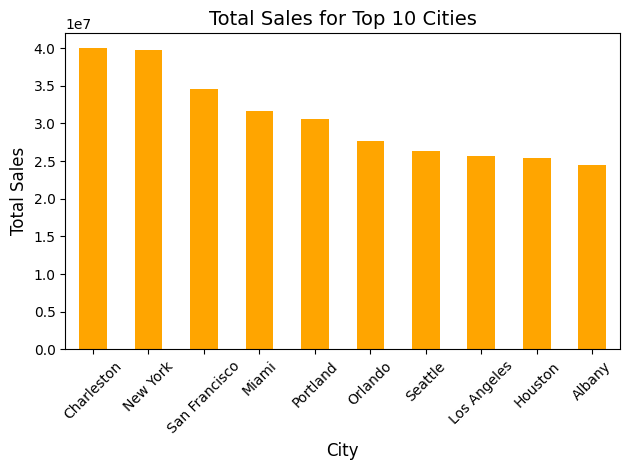

In [ ]:
top_cities = df.groupby("City")["Total Sales"].sum().nlargest(10)
top_cities.plot(kind="bar",color="orange")
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales for Top 10 Cities", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Note: The sales are highest in Charleston, New York and San Francisco.

### 6.11 Box Plot to Visualize Operating Profit by Region

In [ ]:
prof_by_reg = df.groupby('Region')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
prof_by_reg

,Region,Operating Profit
0,West,89609406.55
1,Northeast,68020587.65
2,South,61138004.07
3,Southeast,60555416.70
4,Midwest,52811346.48


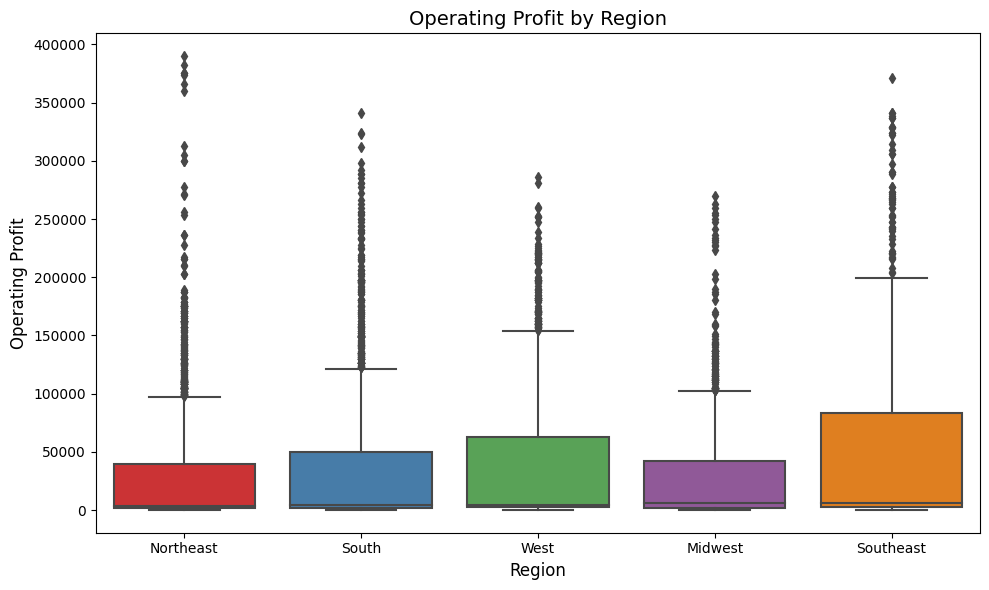

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Region",y="Operating Profit",data=df, palette = "Set1")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Operating Profit", fontsize=12)
plt.title("Operating Profit by Region",fontsize=14)
plt.tight_layout()
plt.show()

Note: The total sales is highest for West and then Northeast, but the most number of outliers is in Northeast and Southeast.

### 6.12 Histogram to visualize the distribution of total sales.

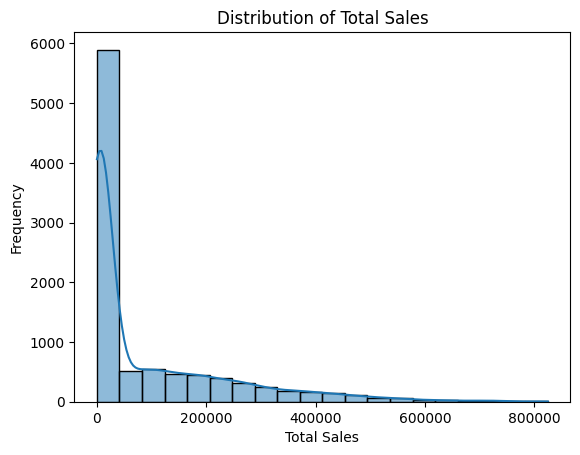

In [ ]:
sns.histplot(df["Total Sales"], bins=20, kde=True)
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales')
plt.show()

Note: Distribution of sales is left skewed.

### 6.13 Distribution of Price per Unit

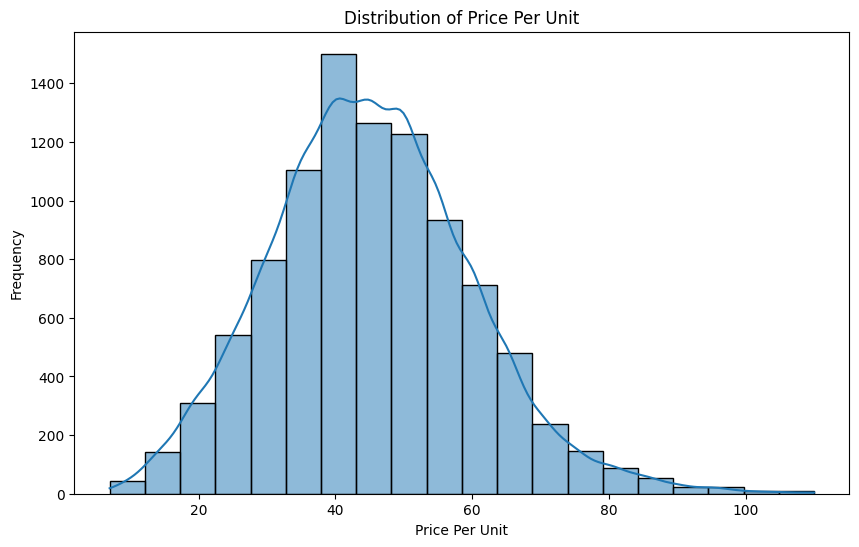

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["Price per Unit"],bins=20, kde=True)
plt.title("Distribution of Price Per Unit")
plt.xlabel("Price Per Unit")
plt.ylabel("Frequency")
plt.show()

Observation:
* The price per unit follows a normal distribution. It peaks at 40 dollars, which means the 40 dollars price point is the most common.
* The majority of the products have prices between 20 dollars and 80 dollars.

### 6.14 Price per unit Vs. Total Sales

In [ ]:
px.scatter(df, x='Price per Unit',y='Total Sales', color='Product',title='Price per unit Vs. Total Sales')

Observation:
* Seems like there is a positive correlation between the total sales and price per unit of most products.
Observations

* Products with the prices of 60, 65 and 70 are making more sales.
* We can clearly see that there is a positive relationship between price per unit and total sales. If price per unit increases, profit is also increasing.
* It's apparent that the sales of men's street footwear are the highest in total.

### 6.15 Monthly Sales over Years

In [ ]:
mon_sales_over_years = df.groupby(['Year','Month1'])['Total Sales'].sum().reset_index()
mon_sales_over_years

,Year,Month1,Total Sales
0,2020,1,16253746.0
1,2020,2,14997988.0
2,2020,3,17660577.0
3,2020,4,24607006.0
4,2020,5,16918014.0
5,2020,6,8829819.0
6,2020,7,17146013.0
7,2020,8,19877980.0
8,2020,9,18304436.0
9,2020,10,10836269.0


In [ ]:
px.line(mon_sales_over_years,x='Month1', y='Total Sales', color = 'Year', markers=True, template= "none")

In [ ]:
df.groupby('Year')['Total Sales'].sum().reset_index()

,Year,Total Sales
0,2020,182080675.0
1,2021,717821450.0


Note: There is a huge spike in  total sales in 2021, compared to 2020.

Observations

The sales have shown significant growth from 2020 to 2021.

2021

There was a dip in sales during March, followed by a rise that peaked in July, a decline in August, and another rise starting in November.
The month of July had the highest sales with 78.33 million dollars.
In terms of sales, March generated the lowest revenue of 39.14 million dollars.
Total Sales 717.82 million dollars
2020

There was a rise in sales in April, followed by a decline and dip in June, another rise and dip in October, and an all-time low in December.
The month of April had the highest sales with 24.60 million dollars.
In terms of sales, December generated the lowest revenue of 8.02 million dollars.
Total Sales 182.08 million dollars

In [ ]:
df.groupby(['Sales Method', 'Year'])['Total Sales'].sum().reset_index()

,Sales Method,Year,Total Sales
0,In-store,2020,93903000.0
1,In-store,2021,262740750.0
2,Online,2020,4519966.0
3,Online,2021,243152916.0
4,Outlet,2020,83657709.0
5,Outlet,2021,211927784.0


In [ ]:
df.groupby(['Product', 'Year'])['Total Sales'].sum().reset_index()

,Product,Year,Total Sales
0,Men's Apparel,2020,26216964.0
1,Men's Apparel,2021,97511668.0
2,Men's Athletic Footwear,2020,31794462.0
3,Men's Athletic Footwear,2021,121879218.0
4,Men's Street Footwear,2020,37823020.0
5,Men's Street Footwear,2021,171003224.0
6,Women's Apparel,2020,35190332.0
7,Women's Apparel,2021,143848528.0
8,Women's Athletic Footwear,2020,23629892.0
9,Women's Athletic Footwear,2021,83002004.0


Note: There is a huge spike in  total sales in 2021, compared to 2020. After checking the total sales for sales method and products, it is obvious that it is because of Covid 19 that the sales plunged in 2020.

### 6.16 Monthly Profit over Years

In [ ]:
mon_prof_over_years = df.groupby(['Year','Month1'])['Operating Profit'].sum().reset_index()
mon_prof_over_years

,Year,Month1,Operating Profit
0,2020,1,5830005.41
1,2020,2,5207354.44
2,2020,3,5862006.26
3,2020,4,9301293.34
4,2020,5,5870841.95
5,2020,6,2292727.41
6,2020,7,4917665.11
7,2020,8,7338924.54
8,2020,9,7119702.44
9,2020,10,4139469.21


In [ ]:
px.line(mon_prof_over_years,x='Month1',y='Operating Profit',color='Year',markers=True, template="none")

In [ ]:
df.groupby('Year')['Operating Profit'].sum().reset_index()

,Year,Operating Profit
0,2020,6.337566e+07
1,2021,2.687591e+08


### 6.17 Treemap for Adidas Sales by Region and State

In [ ]:
px.treemap(df,path=['Region','State'], values='Total Sales', title = 'Treemap for Sales by Region and State')

Observations

In the West, California has the highest sales, while Utah has the least sales.
In the Northeast, New york has the highest sales, while Maryland has the least sales.
In the Southeast, Florida has the highest sales, while Kentucky has the least sales.
In the South, Texas has the highest sales, while Oklahoma has the least sales.
In the Midwest, Michigan has the highest sales, while Nebraska has the least sales.

### 6.18 Pairplot for Multiple Metrics

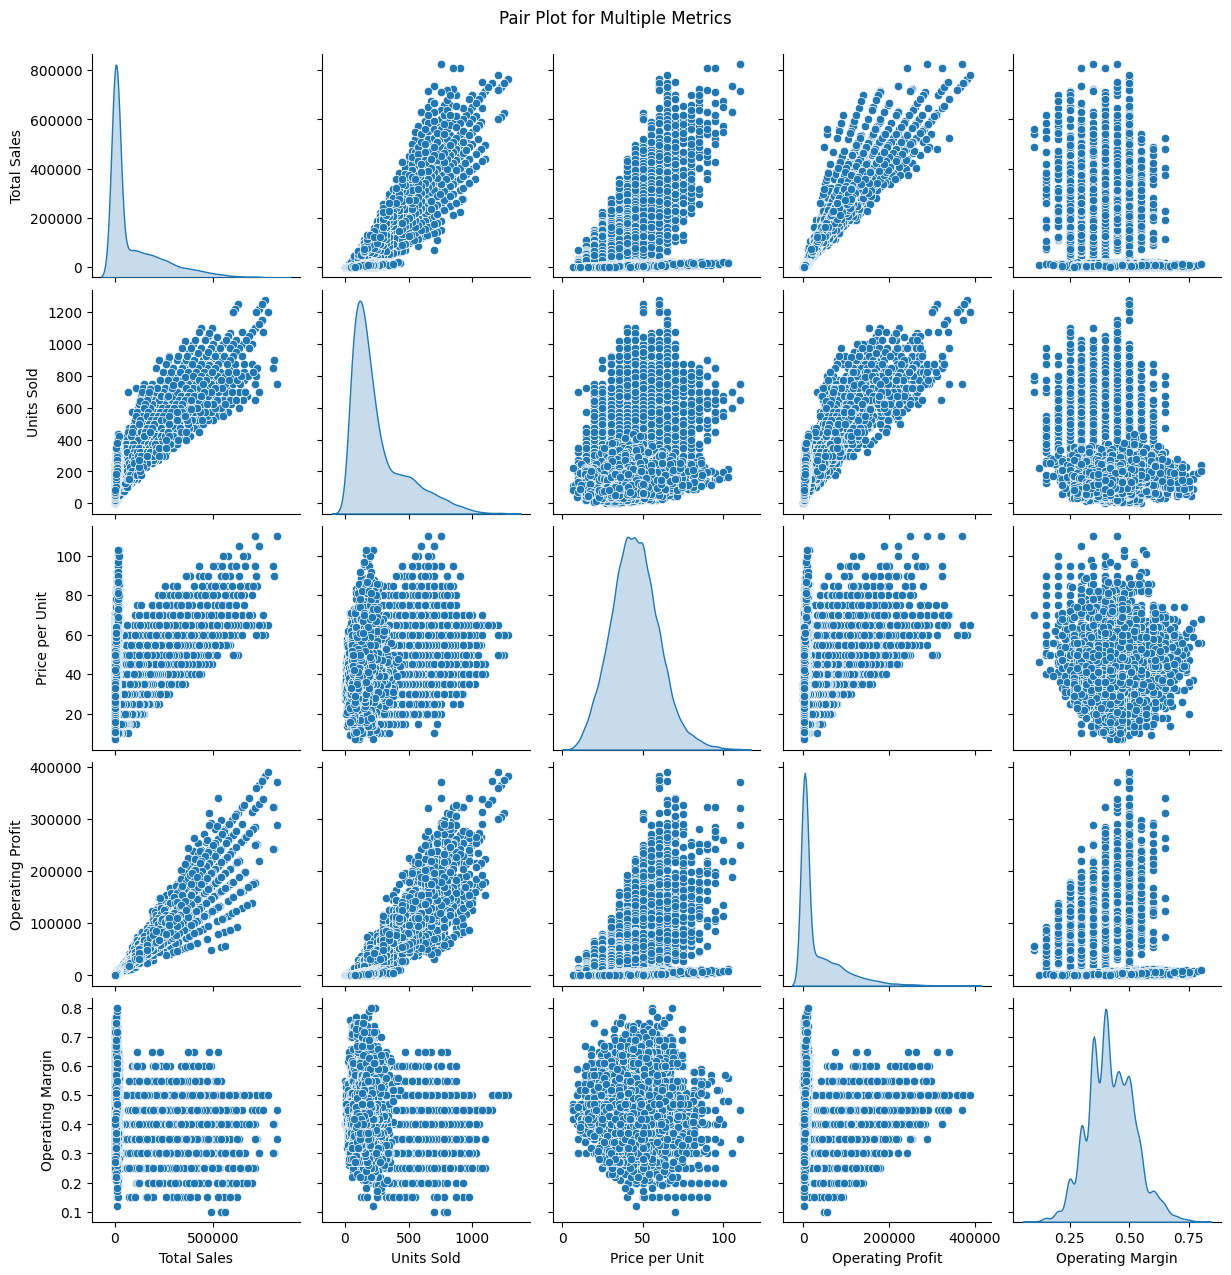

In [ ]:
sns.pairplot(df[['Total Sales', 'Units Sold', 'Price per Unit', 'Operating Profit', 'Operating Margin']], diag_kind='kde')
plt.suptitle('Pair Plot for Multiple Metrics', y=1.02)
plt.show()

Observations

* There is a positive relationship between total sales and price per unit.
The number of units sold tends to increase when there is an increase in total sales.
* The price per unit ranges from 7 Dollars to 110 Dollars.
* A majority of the price per unit falls between 35 Dollars and 55 Dollars.
As sales increase, the profit also tends to increase.
The profit margin typically falls between 25% and 75%.

Conclusion
Product Category Analysis:

Top Selling Product Category:

Men's Street Footwear is the top-selling category, followed by Men's Athletic Footwear.
Women's Apparel holds the 3rd place, while Men's Apparel is the least-selling category.
Regional Sales Analysis:

The West region leads in total sales, followed by the Northwest.
The Midwest contributes to only 15.1% of total sales, making it a minor contributor.
Retailer Performance:

West Gear leads in operating profit, followed closely by Foot Locker and Sports Direct.
Kohl's, Amazon, and Walmart have significant contributions but are less compared to the top 3.
State and City Sales Analysis:

New York state has the highest total sales, and New York City is the top-selling city.
Nebraska is the least-selling state, and Omaha is the least-selling city.
The other 4 states (Minnesota, Iowa, Wisconsin, North Dakota) in the bottom 5 have sales around 7 million dollars.
Sales Method and Pricing:

The majority of sales (39.6%) are In-Store, followed by Outlet (32.8%) and Online (27.5%).
Price per unit follows a normal distribution, peaking at 40 Dollars.
Price per Unit vs Total Sales:

Products priced at 60 Dollars, 65 Dollars, and 70 Dollars have higher sales.
There is a positive relationship between price per unit and total sales.
Monthly Sales and Profit Trends:

Sales and profit show significant growth from 2020 to 2021.
Peaks in sales and profit are observed in July for both years.
December has the lowest sales and profit for both years.
Regional Sales Distribution:

The treemap visually represents sales distribution across different regions and states.
It highlights the top-selling states in each region.
Overall Insights:

This report gives a thorough picture of Adidas' sales performance across all product categories, geographical areas, retailers, and sales methods. Strategic decisions require knowledge of the best-performing product categories, regions, and merchants. The relationship between price per unit and overall sales is favorable, which points to the potential for improving product pricing strategies.

The analysis also identifies seasonal patterns in sales and profit, highlighting the significance of efficient inventory control and marketing plans during busy times. The regional sales distribution can also direct resource allocation and targeted marketing campaigns to increase sales in particular regions.

For Adidas to experience greater development and profitability, critical business choices such as inventory planning, marketing initiatives, and regional focus regions can be informed by the information gleaned from this analysis.

### Creation of map using plotly express

In [ ]:
# Create a map using Plotly Express
fig = px.scatter_geo(df,
                     locations="City",  # Use the City column for location data
                     locationmode="USA-states",  # Set location mode to USA-states (you may adjust this depending on your data)
                     color="Retailer",  # Color points by Retailer
                     hover_name="Retailer",  # Display Retailer name on hover
                     scope="usa",  # Set the map scope (you may adjust this depending on your data)
                     title="Retailer Locations Map")

# Customize the layout if needed
fig.update_geos(projection_type="albers usa")
fig.update_layout(geo_scope="usa")

# Show the map
fig.show()

### Feature Encoding

#### First Converting Categorical to Numerical Features

In [ ]:
df.head()
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 904.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_to_num = df_copy[['Retailer','Region','State','City','Product']]
le = LabelEncoder()
for i in cat_to_num:
  df_copy[i] = le.fit_transform(cat_to_num[i])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   int64         
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   int64         
 4   State             9648 non-null   int64         
 5   City              9648 non-null   int64         
 6   Product           9648 non-null   int64         
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 904.6 KB


### Feature Selection
#### Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score#Splitting of Dataset
X = df_copy.drop(['Total Sales', 'Invoice Date'], axis=1) #features
y = df_copy['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
!pip install lazypredict

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modelling

In [ ]:
# Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor
# fitting data in LazyRegressor because
# here we are solving Regression use case.
reg = LazyRegressor(verbose=0,
                    ignore_warnings=False,
                    custom_metric=None)

# fitting data in LazyClassifier
models, predictions = reg.fit(X_train, X_test,
                              y_train, y_test)
# lets check which model did better
# on Breast Cancer Dataset
print(models)

 21%|██▏       | 9/42 [00:07<00:47,  1.45s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 74%|███████▍  | 31/42 [00:55<00:12,  1.12s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [01:16<00:01,  1.82s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 7718, number of used features: 10
[LightGBM] [Info] Start training from score 94457.901399


100%|██████████| 42/42 [01:17<00:00,  1.83s/it]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
ExtraTreesRegressor                          1.00       1.00   2210.32   
ExtraTreeRegressor                           1.00       1.00   3995.64   
XGBRegressor                                 1.00       1.00   4064.41   
RandomForestRegressor                        1.00       1.00   4255.43   
LGBMRegressor                                1.00       1.00   4259.19   
HistGradientBoostingRegressor                1.00       1.00   4987.02   
BaggingRegressor                             1.00       1.00   5008.54   
DecisionTreeRegressor                        1.00       1.00   5211.28   
GradientBoostingRegressor                    1.00       1.00   5733.63   
GaussianProcessRegressor                     0.99       0.99  13345.75   
KNeighborsRegressor                          0.98       0.98  19260.11   
SGDRegressor                          